# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [1]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-
To: /content/Bus_Breakdown_and_Delays.csv
100% 34.4M/34.4M [00:00<00:00, 212MB/s]


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [2]:
df = pd.read_csv("/content/Bus_Breakdown_and_Delays.csv")

In [41]:
df.duplicated().sum()

0

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [42]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [5]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [44]:
df["Boro"].sample(5)

,Boro
46074,NaN
37999,Brooklyn
39975,Bronx
53250,Manhattan
145881,Manhattan


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [39]:
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()


for col in cat_cols:
  print("#################")
  print(df[col].value_counts())
  print("#################")


#################
School_Year
2016-2017    83141
2015-2016    63184
2017-2018     1646
2019-2020        1
Name: count, dtype: int64
#################
#################
Run_Type
Special Ed AM Run          85990
Pre-K/EI                   20951
Special Ed PM Run          17672
General Ed AM Run          17182
General Ed PM Run           4541
Special Ed Field Trip        628
General Ed Field Trip        570
Project Read PM Run          300
Project Read AM Run           47
Project Read Field Trip        2
Name: count, dtype: int64
#################
#################
Bus_No
9354     468
357      465
9302     434
118      357
9320     349
        ... 
20133      1
1140D      1
553D       1
160D       1
K9345      1
Name: count, Length: 10765, dtype: int64
#################
#################
Route_Number
1         2569
2         2217
3         1904
5         1740
4         1093
          ... 
26Q7MD       1
M688         1
JC-1         1
W656         1
1409B        1
Name: count, Length: 11283

- There is no correlation


<Axes: >

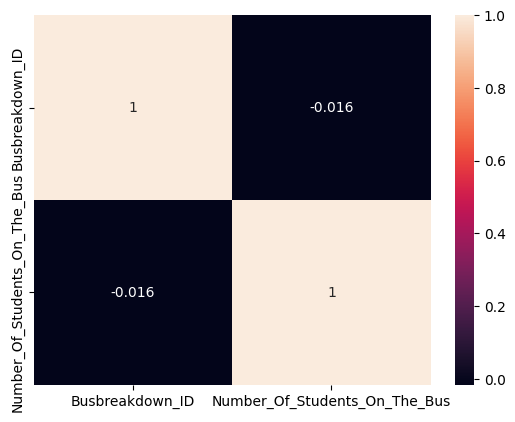

In [19]:
df_corr = df.select_dtypes(include=["int64"]).corr()
sns.heatmap(df_corr, annot=True)

- Outliers

<Axes: xlabel='Number_Of_Students_On_The_Bus'>

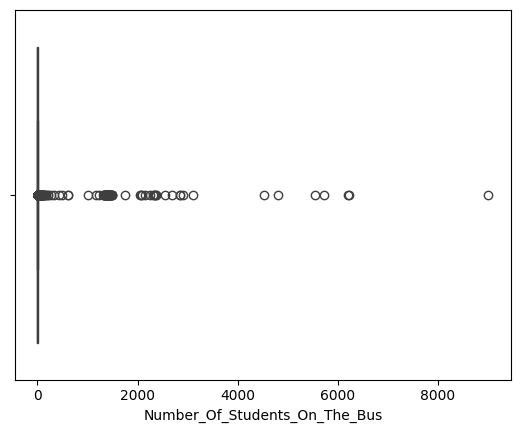

In [23]:
sns.boxplot(x=df["Number_Of_Students_On_The_Bus"])

In [35]:
df[["Number_Of_Students_On_The_Bus"]].query("Number_Of_Students_On_The_Bus > 2000")

,Number_Of_Students_On_The_Bus
19492,2368
21203,9007
21571,2154
23312,2312
23572,4802
31138,2045
36428,5554
38768,3112
41279,2680
42762,2844


<Axes: xlabel='Breakdown_or_Running_Late', ylabel='count'>

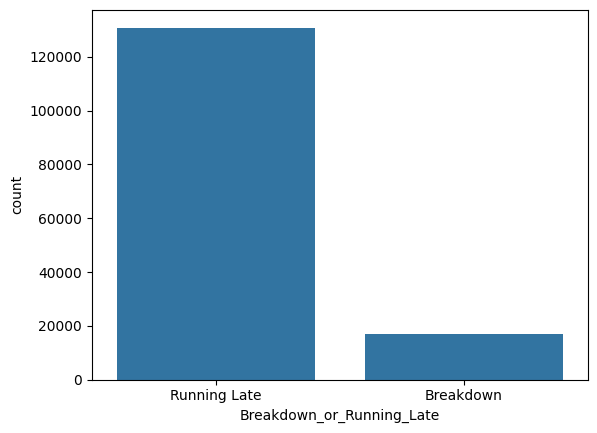

In [17]:
sns.countplot(df, x="Breakdown_or_Running_Late")

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.


# TODO:
#  DROP Incident_Number, Busbreakdown_ID, Created_On, Bus_No, Schools_Serviced, Bus_Company_Name, School_Year, Number_Of_Students_On_The_Bus

# Make them consistent: How_Long_Delayed

# Check thier possible values: Reason

# drop nan rows: Route_Number,Reason, Run_Type, Boro
# fill nan How_Long_Delayed with with 0

# Encode: Run_Type, Route_Number, Reason, Occurred_On, Boro

# Balance: Breakdown_or_Running_Late

# Change type: Informed_On, Last_Updated_On, Occurred_On

### Drop unnecessary columns

In [15]:
df1  = df.drop(columns=["Bus_Company_Name", "Incident_Number", "Busbreakdown_ID", "Created_On", "Bus_No", "Schools_Serviced", "Bus_Company_Name", "School_Year"])

- `How_Long_Delayed == nan` means `Breakdown`


In [4]:

df1[["How_Long_Delayed", "Breakdown_or_Running_Late"]].sample(10)

,How_Long_Delayed,Breakdown_or_Running_Late
48551,25MINS,Running Late
78292,30 minutes,Running Late
106369,30 mins,Running Late
97468,20 mins,Running Late
95826,25 MINUTES,Running Late
27888,20-25 MIN,Running Late
104579,25 MIN,Running Late
62916,NaN,Breakdown
129786,1 HR,Running Late
85533,NaN,Breakdown


- **Duble check**

In [131]:
df1[["How_Long_Delayed", "Breakdown_or_Running_Late"]].query("Breakdown_or_Running_Late == 'Breakdown'").sample(20)

,How_Long_Delayed,Breakdown_or_Running_Late
21910,NaN,Breakdown
5720,NaN,Breakdown
20353,NaN,Breakdown
63144,NaN,Breakdown
61980,NaN,Breakdown
57974,NaN,Breakdown
75929,NaN,Breakdown
67405,NaN,Breakdown
122662,NaN,Breakdown
15439,NaN,Breakdown


### Drop and fill nan rows

In [56]:
cols_to_drop = ["Route_Number", "Reason", "Run_Type", "Boro"]

# drop nan rows: Route_Number,Reason, Run_Type, Boro
df2 = df1.dropna(subset=cols_to_drop)

# fill nan How_Long_Delayed with with 0
df2 =df2.fillna("0")

In [133]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120542 entries, 0 to 147971
Data columns (total 14 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   Run_Type                         120542 non-null  object
 1   Route_Number                     120542 non-null  object
 2   Reason                           120542 non-null  object
 3   Occurred_On                      120542 non-null  object
 4   Boro                             120542 non-null  object
 5   How_Long_Delayed                 120542 non-null  object
 6   Number_Of_Students_On_The_Bus    120542 non-null  int64 
 7   Has_Contractor_Notified_Schools  120542 non-null  object
 8   Has_Contractor_Notified_Parents  120542 non-null  object
 9   Have_You_Alerted_OPT             120542 non-null  object
 10  Informed_On                      120542 non-null  object
 11  Last_Updated_On                  120542 non-null  object
 12  Breakdown_or_Running_

In [7]:
df2.isnull().sum()

,0
Run_Type,0
Route_Number,0
Reason,0
Occurred_On,0
Boro,0
How_Long_Delayed,0
Number_Of_Students_On_The_Bus,0
Has_Contractor_Notified_Schools,0
Has_Contractor_Notified_Parents,0
Have_You_Alerted_OPT,0


<Axes: xlabel='Breakdown_or_Running_Late', ylabel='count'>

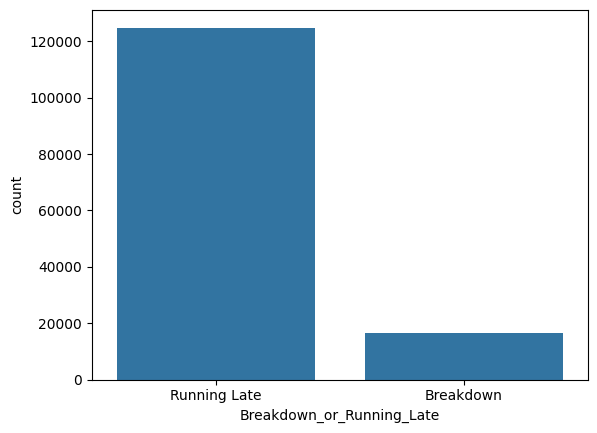

In [144]:
sns.countplot(df2, x="Breakdown_or_Running_Late")

In [150]:
df2.head()

,Run_Type,Route_Number,Reason,Occurred_On,Boro,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,Pre-K/EI,1,Other,10/26/2015 08:30:00 AM,Bronx,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,Pre-K/EI,1,Heavy Traffic,10/27/2015 07:10:00 AM,Bronx,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,Pre-K/EI,2,Heavy Traffic,09/18/2015 07:36:00 AM,Bronx,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,Pre-K/EI,2,Other,09/17/2015 08:08:00 AM,Bronx,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,Pre-K/EI,2,Other,09/18/2015 07:39:00 AM,Bronx,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,09/18/2015 07:56:40 AM,Running Late,Pre-K


### Encoding

In [8]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 141383 entries, 0 to 147971
Data columns (total 14 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   Run_Type                         141383 non-null  object
 1   Route_Number                     141383 non-null  object
 2   Reason                           141383 non-null  object
 3   Occurred_On                      141383 non-null  object
 4   Boro                             141383 non-null  object
 5   How_Long_Delayed                 141383 non-null  object
 6   Number_Of_Students_On_The_Bus    141383 non-null  int64 
 7   Has_Contractor_Notified_Schools  141383 non-null  object
 8   Has_Contractor_Notified_Parents  141383 non-null  object
 9   Have_You_Alerted_OPT             141383 non-null  object
 10  Informed_On                      141383 non-null  object
 11  Last_Updated_On                  141383 non-null  object
 12  Breakdown_or_Running_

In [19]:
df2.sample(5)

,Run_Type,Route_Number,Reason,Occurred_On,Boro,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
43921,Special Ed PM Run,X059,Late return from Field Trip,04/21/2016 01:52:00 PM,Bronx,15 minutes,0,Yes,No,No,04/21/2016 01:53:00 PM,04/21/2016 01:53:50 PM,Running Late,School-Age
124002,Special Ed AM Run,X523,Won`t Start,05/04/2017 06:36:00 AM,Bronx,0,0,Yes,Yes,No,05/04/2017 06:38:00 AM,05/04/2017 06:38:36 AM,Breakdown,School-Age
88899,Special Ed AM Run,M254,Heavy Traffic,12/19/2016 07:35:00 AM,Manhattan,20 MIN,5,Yes,No,Yes,12/19/2016 07:43:00 AM,12/19/2016 07:43:15 AM,Running Late,School-Age
47678,Special Ed AM Run,R610,Flat Tire,05/13/2016 05:30:00 AM,Staten Island,15-20 min,0,No,No,No,05/13/2016 06:06:00 AM,05/13/2016 06:06:06 AM,Running Late,School-Age
112471,Special Ed PM Run,X938,Heavy Traffic,03/23/2017 02:51:00 PM,Bronx,25-30 mins,0,Yes,Yes,Yes,03/23/2017 02:52:00 PM,03/23/2017 03:01:32 PM,Running Late,School-Age


In [59]:

cat_cols = df2.select_dtypes(include=["object"], exclude=["int"]).columns.tolist()
print(cat_cols)

['Run_Type', 'Route_Number', 'Reason', 'Occurred_On', 'Boro', 'How_Long_Delayed', 'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents', 'Have_You_Alerted_OPT', 'Informed_On', 'Last_Updated_On', 'Breakdown_or_Running_Late', 'School_Age_or_PreK']


In [72]:
# df3 = pd.get_dummies(df2)
# df3

cat_cols = df2.select_dtypes(include=["object"], exclude=["int"]).columns.tolist()
print(cat_cols)
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in cat_cols:
  df2[col] = encoder.fit_transform(df2[col])



[]


In [73]:
df2.head()

,Run_Type,Route_Number,Reason,Occurred_On,Boro,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,3,77,6,55121,1,187,5,1,1,0,59467,111461,1,0
1,3,77,3,55421,1,820,3,1,1,0,59774,112037,1,0
2,3,209,3,47085,1,327,12,1,1,1,50489,93929,1,0
3,3,209,6,46945,1,106,11,1,1,1,50318,93662,1,0
4,3,209,6,47088,1,187,12,1,1,0,50496,93989,1,0


## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [100]:
X = df2.drop(columns=["Breakdown_or_Running_Late"])

y= df2["Breakdown_or_Running_Late"]

### Balancing

In [101]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

In [87]:
len(X.columns)

13

In [102]:
from sklearn.model_selection import train_test_split

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [91]:
from tensorflow import keras


model = keras.Sequential()
model.add(keras.Input(shape=(13,)))
model.add(keras.layers.Dense(16, activation="relu", kernel_initializer="uniform"))
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(32, activation="relu"))

model.add(keras.layers.Dense(2, activation="softmax"))



## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [94]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

## Training the Model
Train the ANN model using the training data.

In [109]:

model.fit(X_train, y_train, epochs=10,)

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 199732
'y' sizes: 49934


## Evaluate the Model
Evaluate the performance of the model on the test set.

In [ ]:
model.evaluate(X_test, y_test)

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [ ]:
model.predict(X_test, y_test)

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

## Save the Model
Save the trained model for submission.

In [ ]:
import pickle

model_bytes = pickle.dumps(model)

# Initialize mongo connection

# Use "model_bytes" and store it

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: